# 3.6 图像金字塔与轮廓检测

## 3.6.1 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔

![title](images/jinzita.png)
![title](images/Gaussian1.png)
![title](images/Gaussian2.png)

In [1]:
import cv2  #opencv 读取进来为BGR格式
import matplotlib.pyplot as plt
import numpy as np

#一个魔法指令，不需要采用plt.show()显示图像
%matplotlib inline   

In [2]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread('images/lena.jpg')

cv_show('lena',img)
print(img.shape)
print(img)

(300, 300, 3)
[[[ 78 115 195]
  [ 76 113 193]
  [ 74 112 194]
  ...
  [ 48  77 146]
  [ 48  75 149]
  [ 50  77 151]]

 [[ 78 115 195]
  [ 77 114 194]
  [ 75 113 195]
  ...
  [ 52  78 148]
  [ 53  78 150]
  [ 54  79 151]]

 [[ 78 115 195]
  [ 77 114 194]
  [ 76 113 195]
  ...
  [ 55  81 148]
  [ 56  82 149]
  [ 57  82 152]]

 ...

 [[ 54  88 164]
  [ 62  96 172]
  [ 72 106 182]
  ...
  [ 37  38  72]
  [ 38  39  73]
  [ 39  40  74]]

 [[ 53  87 163]
  [ 62  96 172]
  [ 72 106 182]
  ...
  [ 37  39  70]
  [ 40  39  71]
  [ 41  40  72]]

 [[ 53  87 163]
  [ 62  96 172]
  [ 73 107 183]
  ...
  [ 37  39  69]
  [ 40  39  71]
  [ 41  40  72]]]


In [8]:
up = cv2.pyrUp(img)

cv_show('up',up)
print(up.shape)

(600, 600, 3)


In [9]:
down = cv2.pyrDown(img)

cv_show('down', down)
print(down.shape)

(150, 150, 3)


In [10]:
up2 = cv2.pyrUp(up)

cv_show('up2',up2)
print(up2.shape)

(1200, 1200, 3)


In [15]:
up = cv2.pyrUp(img)
up_down = cv2.pyrDown(up)
cv_show('img_up_down',up_down)
print(up_down.shape)
print(up_down)

res = np.hstack((img,up_down))

cv_show('res',res)

cv_show('img-updown',img-up_down)

(300, 300, 3)
[[[ 77 114 194]
  [ 76 114 194]
  [ 75 113 195]
  ...
  [ 50  77 147]
  [ 50  77 149]
  [ 52  78 151]]

 [[ 77 114 195]
  [ 77 114 194]
  [ 76 113 195]
  ...
  [ 52  78 148]
  [ 53  78 149]
  [ 54  79 151]]

 [[ 77 114 194]
  [ 77 114 194]
  [ 76 114 195]
  ...
  [ 55  80 147]
  [ 56  81 149]
  [ 57  81 150]]

 ...

 [[ 58  92 168]
  [ 63  97 173]
  [ 72 106 182]
  ...
  [ 37  38  72]
  [ 38  39  73]
  [ 39  40  73]]

 [[ 57  91 167]
  [ 62  96 172]
  [ 72 106 182]
  ...
  [ 37  39  70]
  [ 39  39  72]
  [ 40  40  72]]

 [[ 57  91 167]
  [ 63  97 173]
  [ 72 106 182]
  ...
  [ 38  39  69]
  [ 40  39  71]
  [ 41  40  72]]]


## 拉普拉斯金字塔
![title](images/Laplas.png)

In [17]:
down = cv2.pyrDown(img)
up_down = cv2.pyrUp(down)
res2 = img- up_down

cv_show('Laplace',res2)

## 3.6.2 图像轮廓

### 什么是轮廓?

#### 轮廓可以简单地解释为连接具有相同颜色或强度的所有连续点（沿边界）的曲线。轮廓是用于形状分析以及对象检测和识别的有用工具。
- 为了获得更高的准确性，请使用二进制图像。因此，在找到轮廓之前，请应用阈值或canny边缘检测。
- 从OpenCV 3.2开始，findContours()不再修改源图像
- 在OpenCV中，找到轮廓就像从黑色背景中找到白色物体。因此请记住，要找到的对象应该是白色，背景应该是黑色。

![title](images/imgContour.png)
![title](images/none.jpg)

In [75]:
img = cv2.imread('images/test2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY)
cv_show('thresh', thresh)

In [76]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [77]:
np.array(contours).shape

(131,)

In [78]:
# 绘制轮廓
# 使用cv.drawContours函数。只要有边界点，它也可以用来绘制任何形状。它的第一个参数是源图像，第二个参数是应该作为Python列表传递的轮廓
# 第三个参数是轮廓的索引（在绘制单个轮廓时有用。要绘制所有轮廓，请传递-1），其余参数是颜色，厚度等等.
# 注意需要copy，要不原图像会变。。。

draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0,0,255),2)
cv_show('res', res)
cv_show('img',img)

In [36]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 0, (0,255,0),2)
cv_show('res', res)
cv_show('img',img)

In [30]:
res = cv2.drawContours(img, contours, -1, (0,0,255),2)
cv_show('res', res)
cv_show('img',img)

### 轮廓特征

In [41]:
cnt = contours[0]

In [44]:
# 面积
area = cv2.contourArea(cnt) 
print(area)

478224.5


In [46]:
# 轮廓周长, True表示闭合的
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

2866.526911139488


In [49]:
# 特征矩
M = cv2.moments(cnt)
#print( M )

# 质心
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print(cx,cy)

399 299


### 轮廓近似
![title](images/contourAppr.png)

In [103]:
img2 = cv2.imread('images/star.png')

img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(img2_gray,127,255,0)

contours,hierarchy = cv2.findContours(thresh, 1, 2)

draw_img = img2.copy()
res = cv2.drawContours(img2,contours, -1, (0,0,255),2)
cv_show('res', res)

cnt = contours[0]

In [106]:
epsilon = 0.1*cv2.arcLength(cnt,True) 
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img2.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0,255,0),2)
cv_show('res', res)

### 模板匹配

- 模板匹配和卷积原理很像，模板在原图像上从缘点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图像是A*B大小，而模板是a*b大小，则输出结果的矩阵是(A-a+1)*(B-b+1)。

In [141]:
# 模板匹配
img = cv2.imread('images/lena.jpg',0)
template = cv2.imread('images/face.jpg',0)
h, w = template.shape[:2]

In [142]:
img.shape

(300, 300)

In [143]:
template.shape

(124, 110)

- TM_SQDIFF:计算平方不同，计算出来的值越小，越相关
- TM_CCORR:计算相关性，计算出来的值越大，越相关
- TM_CCOEFF:计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED:计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED:计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED:计算归一化相关系数，计算出来的值越接近1，越相关

参考：http://www.opencv.org.cn/opencvdoc/2.3.2/html/doc/tutorials/imgproc/histograms/template_matching/template_matching.html
https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html

In [144]:
# 列表中所有的6种比较方法
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [145]:
res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
print(res.shape)  

(177, 191)


In [146]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [117]:
min_val

24688.0

In [118]:
min_loc

(104, 111)

In [119]:
max_val

85860928.0

In [120]:
max_loc

(171, 53)

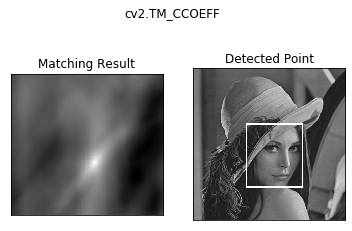

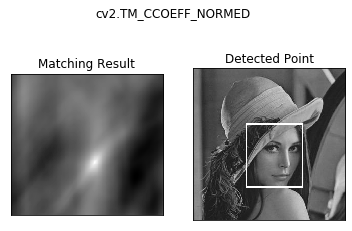

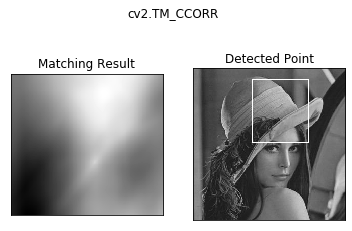

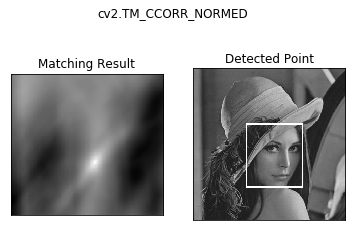

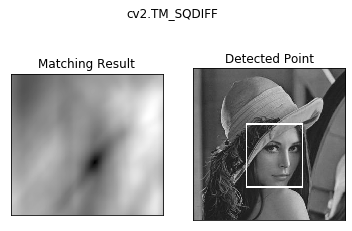

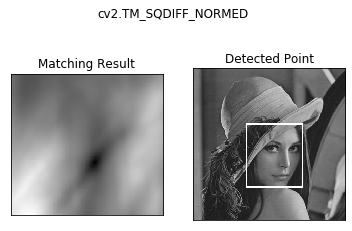

In [151]:
img = cv2.imread('images/lena.jpg',0)
img2 = img.copy()
template = cv2.imread('images/face.jpg',0)

w, h = template.shape[::-1]

# 列表中所有的6种比较方法
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # 应用模板匹配
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果方法是TM_SQDIFF或TM_SQDIFF_NORMED，则取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### 多对象的模板匹配
- 假设您正在搜索具有多次出现的对象，则**cv.minMaxLoc**()不会为您提供所有位置。在这种情况下，我们将使用阈值化。

In [3]:
img_rgb = cv2.imread('images/mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images/mario_coin.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# 取匹配程度大于80%的坐标
threshold = 0.8
loc = np.where( res >= threshold)
img_rgb2 = img_rgb.copy()
for pt in zip(*loc[::-1]):  #*号表示可选参数
    cv2.rectangle(img_rgb2, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
cv_show('img_rgb',img_rgb2)

#res = np.stack((img_rgb,img_rgb2))
#cv_show('res',res)

## 作业：分别使用颜色布局描述符(Color Layout Descriptor)与方向梯度直方图(HOG)实现图像检索，并且画出图像的PR曲线图。

- PR曲线实则是以precision（精准率）和recall（召回率）这两个为变量而做出的曲线，其中recall为横坐标，precision为纵坐标。
- 召回率(Recall) = 系统检索到的相关文件 / 系统所有相关的文件总数。亦即，预测为真实正例 / 所有真实正例样本的个数。

- 准确率(Precision) = 系统检索到的相关文件 / 系统所有检索到的文件总数。亦即，预测为真实正例 / 所有被预测为正例样本的个数。